<IPython.core.display.Javascript object>


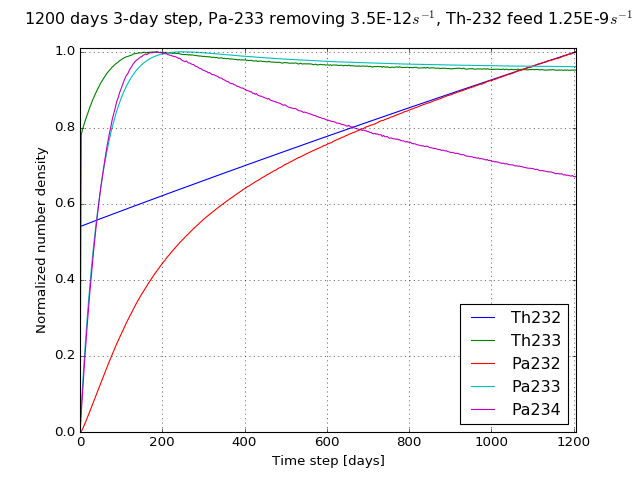

<IPython.core.display.Javascript object>


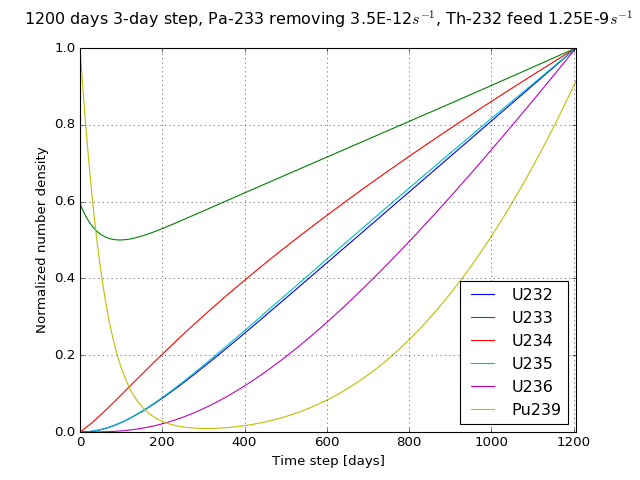

<IPython.core.display.Javascript object>


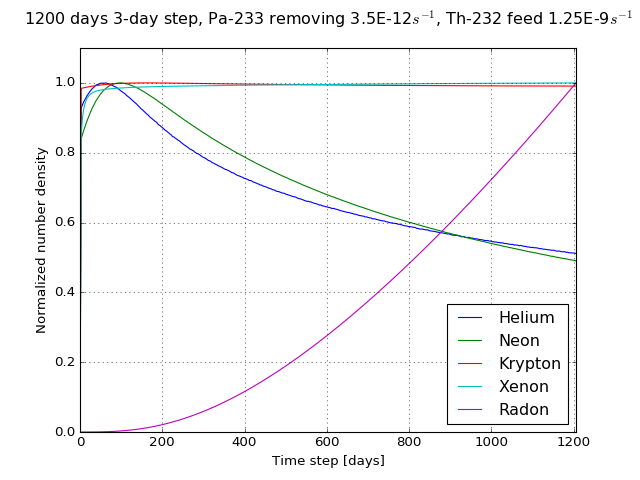

<IPython.core.display.Javascript object>


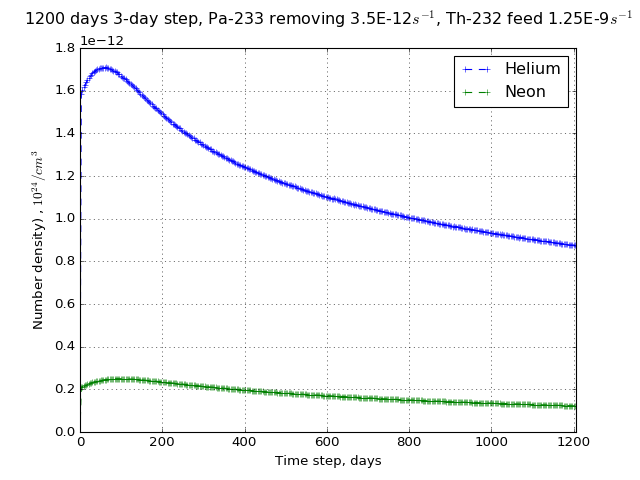

<IPython.core.display.Javascript object>


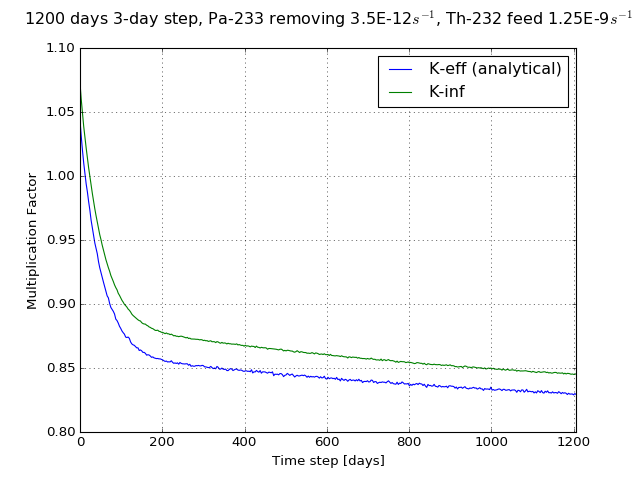

In [2]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent

dep = serpent.parse_dep('/home/andrei2/Desktop/git/msr-neutronics/depletion/online_1200days_Pa_less_Th/core_dep.m', make_mats=False)
res = serpent.parse_res('/home/andrei2/Desktop/git/msr-neutronics/depletion/online_1200days_Pa_less_Th/core_res.m')
plot_title = '1200 days 3-day step, Pa-233 removing 3.5E-12$s^{-1}$, Th-232 feed 1.25E-9$s^{-1}$\n'
days = dep['DAYS']
keff_analytical = res['ANA_KEFF']
kinf_dict = res['ABS_KINF']
bu = res['BURNUP']
keff_a = keff_analytical[:,0]
kinf = kinf_dict[:,0]
burnup = bu[:,0]
EOC = np.amax(days)
#total_mass = dep['TOT_MASS']
total_mass = dep['MAT_fuel_ADENS']
vol_fuel = dep['MAT_fuel_VOLUME']
Th232 = total_mass[0,:]
Th233 = total_mass[1,:]
Pa232 = total_mass[2,:]
Pa233 = total_mass[3,:]
Pa234 = total_mass[4,:]
U232 = total_mass[5,:]
U233 = total_mass[6,:]
U234 = total_mass[7,:]
U235 = total_mass[8,:]
U236 = total_mass[9,:]
Pu239 = total_mass[10,:]
helium = total_mass[11,:]
neon = total_mass[12,:]
krypton = total_mass[13,:]
xenon = total_mass[14,:]
radon = total_mass[15,:]
total_m = total_mass[17,:]

fuel_mass = total_m*vol_fuel

#refill_density = dep['MAT_refill_MDENS']
#refill_mass = refill_density[17,:] * dep['MAT_refill_VOLUME']

Th232_rate = np.diff(Th232) / (10*3600*24) # To obtain atoms per second or g/sec
U233_rate = np.diff(U233) / (10*3600*24)
Pa232_rate = np.diff(Pa232) / (10*3600*24)
Pa233_rate = np.diff(Pa233) / (10*3600*24)
Pa234_rate = np.diff(Pa234) / (10*3600*24)

#print list(res.keys())
#print keff_a
#print (dep['TOT_MASS'])
#print refill_density[17,:]
#print fuel_mass

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
ax.set_ylim(0,1.01)
ax.plot(days, Th232/np.amax(Th232), '-', label='Th232')
ax.plot(days, Th233/np.amax(Th233), '-', label='Th233')
ax.plot(days, Pa232/np.amax(Pa232), '-', label='Pa232')
ax.plot(days, Pa233/np.amax(Pa233), '-', label='Pa233')
ax.plot(days, Pa234/np.amax(Pa234), '-', label='Pa234')
ax.legend(loc=0)
ax.set_ylabel('Normalized number density')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
fig_1.show()
#fig_1.savefig('online_1200days_Pa_less_Th/Th_and_Pa_evolution.png')

# Initialize figure
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
ax.plot(days, U232/np.amax(U232), '-', label='U232')
ax.plot(days, U233/np.amax(U233), '-', label='U233')
ax.plot(days, U234/np.amax(U234), '-', label='U234')
ax.plot(days, U235/np.amax(U235), '-', label='U235')
ax.plot(days, U236/np.amax(U236), '-', label='U236')
ax.plot(days, Pu239/np.amax(Pu239), '-', label='Pu239')
ax.legend(loc=0)
ax.set_ylabel('Normalized number density')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
fig_2.show()
#fig_2.savefig('online_1200days_Pa_less_Th/U_and_Pu_evolution.png')

# Initialize figure
fig_p = matplotlib.pyplot.figure(3)
ax = fig_p.add_subplot(111)
ax.grid(True)
ax.plot(days, helium/np.amax(helium), '-', label='Helium')
ax.plot(days, neon/np.amax(neon), '-', label='Neon')
ax.plot(days, krypton/np.amax(krypton), '-', label='Krypton')
ax.plot(days, xenon/np.amax(xenon), '-', label='Xenon')
ax.plot(days, radon/np.amax(radon), '-', label='Radon')
ax.legend(loc=0)
ax.set_ylabel('Normalized number density')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
ax.set_ylim([0,1.1])
fig_p.show()
#fig_p.savefig('online_1200days_Pa_less_Th/nobel_gases.png')

# Initialize figure
fig_ng = matplotlib.pyplot.figure(4)
ax = fig_ng.add_subplot(111)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax.plot(days[1:], Th232_rate, '-', label='Th232 rate ($10^{24}/s*cm^3$)')
#ax.plot(days[1:], U233_rate, '-', label='U233 rate ($10^{24}/s*cm^3$)')
#ax.plot(days[1:], Pa232_rate, '-', label='Pa232 rate ($10^{24}/s*cm^3$)')
#ax.plot(days[1:], Pa233_rate, '-', label='Pa233 rate ($10^{24}/s*cm^3$)')
#ax.plot(days[1:], Pa234_rate, '-', label='Pa234 rate ($10^{24}/s*cm^3$)')
#ax.plot(days, Pa233, '-', label='Pa233')
#ax.plot(days, U233, '-', label='U233')
#ax.plot(days, Th232, '-', label='Th232')
ax.plot(days, helium, '+--', label='Helium')
ax.plot(days, neon, '+--', label='Neon')
#ax.plot(days, krypton, '+--', label='Krypton')
#ax.plot(days, xenon, '+--', label='Xenon')
#ax.plot(days, radon, '+--', label='Radon')
ax.legend(loc=0)
#ax.set_ylabel('Rate of change (number density) , $10^{24}/s*cm^3$')
ax.set_ylabel('Number density) , $10^{24}/cm^3$')
ax.set_xlabel('Time step, days')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
fig_ng.show()
#fig_ng.savefig('online_1200days_Pa_less_Th/U-Pa_balance.png')

# Initialize figure
fig_keff = matplotlib.pyplot.figure(5)
ax = fig_keff.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(days, keff_a, '-', label='K-eff (analytical)')
ax.plot(days, kinf, '-', label='K-inf')
#ax.plot(days, fuel_mass, '-', label='Total mass (fuel)')
#ax.plot(days, fuel_mass, '-', label='Total mass (fuel)')
#ax.plot(days, burnup, '-', label='Burnup (MWd/kgU)')
#ax.plot(days, neon, '+--', label='Neon')
#ax.plot(days, krypton, '+--', label='Krypton')
#ax.plot(days, xenon, '+--', label='Xenon')
#ax.plot(days, radon, '+--', label='Radon')
ax.legend(loc=0)
ax.set_ylabel('Multiplication Factor')
#ax.set_ylabel('Burnup (MWd/kgU)')
#ax.set_ylabel('Total mass [g]')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
#ax.set_ylim([0,70000000])
fig_keff.show()
fig_keff.savefig('online_1200days_Pa_less_Th/keff.png')